In [46]:
# Importing required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [47]:
# Reading the data

df=pd.read_csv('Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv')
df.head()

,source_URL,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,Book Description,First Published date,Kindle Version and Price,Kindle Price,About the Author
0,https://www.goodreads.com/book/show/62047984-y...,200722,Fiction,Yellowface,R.F. Kuang,3.87,"252,189","37,032",336,Hardcover,Athena Liu is a literary darling and June Hayw...,25-May-23,Kindle $14.99,14.99,"Rebecca F. Kuang is a Marshall Scholar, transl..."
1,https://www.goodreads.com/book/show/61771675-h...,60171,Fiction,Hello Beautiful,Ann Napolitano,4.20,"200,304","19,288",416,Kindle Edition,An emotionally layered and engrossing story of...,14-Mar-23,Kindle $2.99,2.99,"Ann Napolitano’s new novel, Hello Beautiful, h..."
2,https://www.goodreads.com/book/show/62926992-t...,57702,Fiction,The Wishing Game,Meg Shaffer,4.19,"62,142","10,594",304,Hardcover,Make a wish. . . .Lucy Hart knows better than ...,30-May-23,Kindle $2.99,2.99,Meg Shaffer is a film student in TV and Screen...
3,https://www.goodreads.com/book/show/63241104-t...,53470,Fiction,Tom Lake,Ann Patchett,4.13,"127,318","16,108",309,Hardcover,This is a story about Peter Duke who went on t...,1-Aug-23,Kindle $15.99,15.99,"Patchett was born in Los Angeles, California. ..."
4,https://www.goodreads.com/book/show/62873996-t...,45859,Fiction,The Five-Star Weekend,Elin Hilderbrand,4.11,"116,619","8,141",384,Hardcover,From the #1 New York Times bestselling author ...,13-Jun-23,Kindle $14.99,14.99,Elin Hilderbrand lives on Nantucket with her h...


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   source_URL                299 non-null    object 
 1   Readers Choice Votes      299 non-null    int64  
 2   Readers Choice Category   299 non-null    object 
 3   Title                     299 non-null    object 
 4   Author                    299 non-null    object 
 5   Total Avg Rating          299 non-null    float64
 6   Number of Ratings         299 non-null    object 
 7   Number of Reviews         299 non-null    object 
 8   Number of Pages           299 non-null    int64  
 9   Edition                   299 non-null    object 
 10  Book Description          299 non-null    object 
 11  First Published date      299 non-null    object 
 12  Kindle Version and Price  299 non-null    object 
 13  Kindle Price              299 non-null    float64
 14  About the 

In [49]:
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Pages,Kindle Price
count,299.000000,299.000000,299.000000,299.000000
mean,19662.919732,4.063512,392.394649,11.327926
std,32406.337679,0.252188,123.698044,5.351909
min,935.000000,3.520000,192.000000,0.000000
25%,3591.000000,3.855000,320.000000,9.990000
50%,10099.000000,4.060000,368.000000,13.990000
75%,24714.000000,4.250000,432.000000,14.990000
max,397565.000000,4.750000,1242.000000,17.990000


In [50]:
df.isnull().sum()

source_URL                   0
Readers Choice Votes         0
Readers Choice Category      0
Title                        0
Author                       0
Total Avg Rating             0
Number of Ratings            0
Number of Reviews            0
Number of Pages              0
Edition                      0
Book Description             0
First Published date         0
Kindle Version and Price     0
Kindle Price                 0
About the Author            41
dtype: int64

In [51]:
### Removing unnecessary column.

df.drop(['source_URL', 'Book Description', 'About the Author'], axis=1, inplace=True)

In [52]:
df.shape

(299, 12)

In [53]:
df.head(2)

,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price
0,200722,Fiction,Yellowface,R.F. Kuang,3.87,"252,189","37,032",336,Hardcover,25-May-23,Kindle $14.99,14.99
1,60171,Fiction,Hello Beautiful,Ann Napolitano,4.20,"200,304","19,288",416,Kindle Edition,14-Mar-23,Kindle $2.99,2.99


In [54]:
### Removing ',' from Number of ratings and Number of Reviews and converting into 'int' 

numeric_cols=['Number of Ratings', 'Number of Reviews']

for col in numeric_cols:
    df[col] = df[col].replace(',','', regex=True).astype('int32')


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Readers Choice Votes      299 non-null    int64  
 1   Readers Choice Category   299 non-null    object 
 2   Title                     299 non-null    object 
 3   Author                    299 non-null    object 
 4   Total Avg Rating          299 non-null    float64
 5   Number of Ratings         299 non-null    int32  
 6   Number of Reviews         299 non-null    int32  
 7   Number of Pages           299 non-null    int64  
 8   Edition                   299 non-null    object 
 9   First Published date      299 non-null    object 
 10  Kindle Version and Price  299 non-null    object 
 11  Kindle Price              299 non-null    float64
dtypes: float64(2), int32(2), int64(2), object(6)
memory usage: 25.8+ KB


In [56]:
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Kindle Price
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,19662.919732,4.063512,38748.351171,5241.705686,392.394649,11.327926
std,32406.337679,0.252188,79586.655592,10800.069660,123.698044,5.351909
min,935.000000,3.520000,228.000000,71.000000,192.000000,0.000000
25%,3591.000000,3.855000,5516.500000,952.000000,320.000000,9.990000
50%,10099.000000,4.060000,14519.000000,2469.000000,368.000000,13.990000
75%,24714.000000,4.250000,37143.000000,5109.500000,432.000000,14.990000
max,397565.000000,4.750000,930928.000000,141668.000000,1242.000000,17.990000


### Optimizing Data Types

Beyond cleaning numerical columns, we can enhance the dataset by optimizing the data types of other columns. Text-based columns, for instance, can be assigned either string or categorical data types. For example, the "Readers Choice Category" and "Edition" columns are well-suited for the categorical data type. Similarly, the "First Published" column should have its data type converted to datetime.

In [57]:
### Convert the rest of the columns to correct data types

convert_dict={
    'Readers Choice Votes': 'int32',
    'Readers Choice Category':'category',
    'Title':'string',
    'Author':'string',
    'Total Avg Rating':'float16',
    'Number of Pages':'int16',
    'Edition':'category',
    'First Published date':'datetime64[ns]',
    'Kindle Price':'float16'
}

df=df.astype(convert_dict)
df.head()

,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price
0,200722,Fiction,Yellowface,R.F. Kuang,3.869141,252189,37032,336,Hardcover,2023-05-25,Kindle $14.99,14.992188
1,60171,Fiction,Hello Beautiful,Ann Napolitano,4.199219,200304,19288,416,Kindle Edition,2023-03-14,Kindle $2.99,2.990234
2,57702,Fiction,The Wishing Game,Meg Shaffer,4.191406,62142,10594,304,Hardcover,2023-05-30,Kindle $2.99,2.990234
3,53470,Fiction,Tom Lake,Ann Patchett,4.128906,127318,16108,309,Hardcover,2023-08-01,Kindle $15.99,15.992188
4,45859,Fiction,The Five-Star Weekend,Elin Hilderbrand,4.109375,116619,8141,384,Hardcover,2023-06-13,Kindle $14.99,14.992188


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Readers Choice Votes      299 non-null    int32         
 1   Readers Choice Category   299 non-null    category      
 2   Title                     299 non-null    string        
 3   Author                    299 non-null    string        
 4   Total Avg Rating          299 non-null    float16       
 5   Number of Ratings         299 non-null    int32         
 6   Number of Reviews         299 non-null    int32         
 7   Number of Pages           299 non-null    int16         
 8   Edition                   299 non-null    category      
 9   First Published date      299 non-null    datetime64[ns]
 10  Kindle Version and Price  299 non-null    object        
 11  Kindle Price              299 non-null    float16       
dtypes: category(2), dateti

### Cleaning 'Kindle Version and Price' Column

The 'Kindle Version and Price' column contains both the version and the price information. Since we already have another column 'Kindle Price' that stores the price data, we will remove the price information from the 'Kindle Version and Price' column to avoid redundancy.

In [59]:
## Seprate the currency from the test and put it in new column

df['Kindle Version']=df['Kindle Version and Price'].str.extract('([a-zA-Z]+)',expand=False).str.strip()

# Change the column datatype to category datatype

df['Kindle Version'] = df['Kindle Version'].astype('category')

# Remove the previous column

df=df.drop('Kindle Version and Price', axis=1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Readers Choice Votes     299 non-null    int32         
 1   Readers Choice Category  299 non-null    category      
 2   Title                    299 non-null    string        
 3   Author                   299 non-null    string        
 4   Total Avg Rating         299 non-null    float16       
 5   Number of Ratings        299 non-null    int32         
 6   Number of Reviews        299 non-null    int32         
 7   Number of Pages          299 non-null    int16         
 8   Edition                  299 non-null    category      
 9   First Published date     299 non-null    datetime64[ns]
 10  Kindle Price             299 non-null    float16       
 11  Kindle Version           299 non-null    category      
dtypes: category(3), datetime64[ns](1), f

In [61]:
df.head()

,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Price,Kindle Version
0,200722,Fiction,Yellowface,R.F. Kuang,3.869141,252189,37032,336,Hardcover,2023-05-25,14.992188,Kindle
1,60171,Fiction,Hello Beautiful,Ann Napolitano,4.199219,200304,19288,416,Kindle Edition,2023-03-14,2.990234,Kindle
2,57702,Fiction,The Wishing Game,Meg Shaffer,4.191406,62142,10594,304,Hardcover,2023-05-30,2.990234,Kindle
3,53470,Fiction,Tom Lake,Ann Patchett,4.128906,127318,16108,309,Hardcover,2023-08-01,15.992188,Kindle
4,45859,Fiction,The Five-Star Weekend,Elin Hilderbrand,4.109375,116619,8141,384,Hardcover,2023-06-13,14.992188,Kindle


In [62]:
## checking for Duplicate

df[df.duplicated()]

,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Price,Kindle Version


## Analyzing and Visualizing the Data

Readers Choice Category
Fantasy                                  20
Fiction                                  20
Historical Fiction                       20
Horror                                   20
History & Biography                      20
Humor                                    20
Memoir & Autobiography                   20
Romantasy                                20
Mystery & Thriller                       20
Nonfiction                               20
Romance                                  20
Young Adult Fantasy & Science Fiction    20
Science Fiction                          20
Young Adult Fiction                      20
Debut Novel                              19
Name: count, dtype: int64


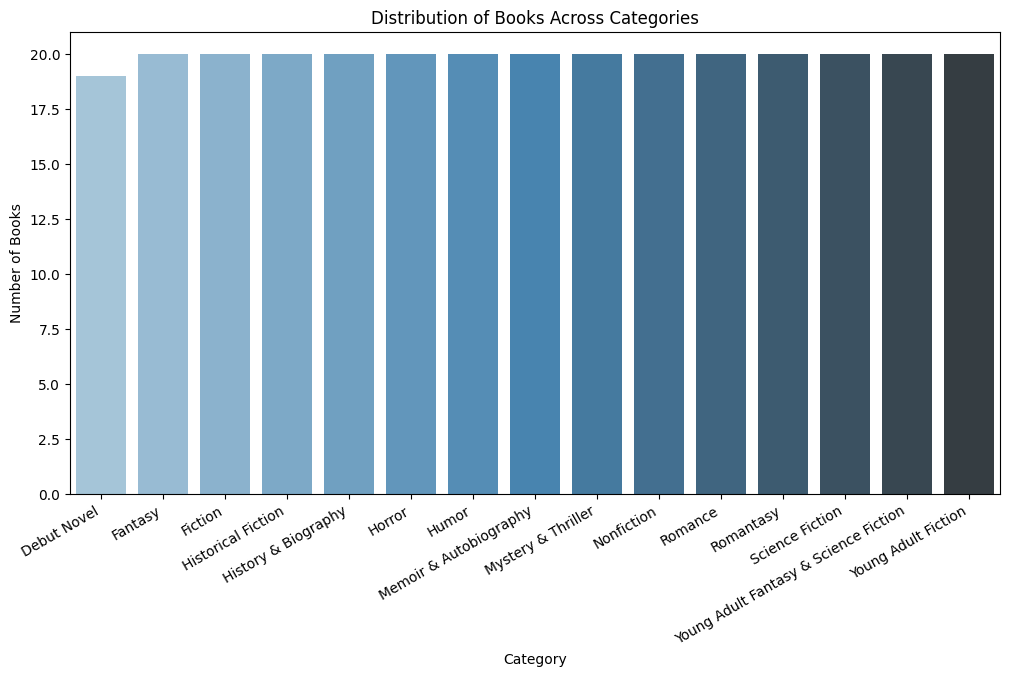

In [63]:
### categorical Distribution

cat_counts = df['Readers Choice Category'].value_counts()
print(cat_counts)


plt.figure(figsize=(12,6))
sns.barplot(x=cat_counts.index, y=cat_counts.values, palette='Blues_d')
plt.title('Distribution of Books Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=30, ha='right')
plt.show()

### Observation 

Our data is evenly distributed across all categories, with an exception of Debut Novel category that only has 19 books.

### Next 

 we will analyze the distribution of votes, ratings, reviews, pages, and price for each category. We are going to use boxplot for plotting distributions.

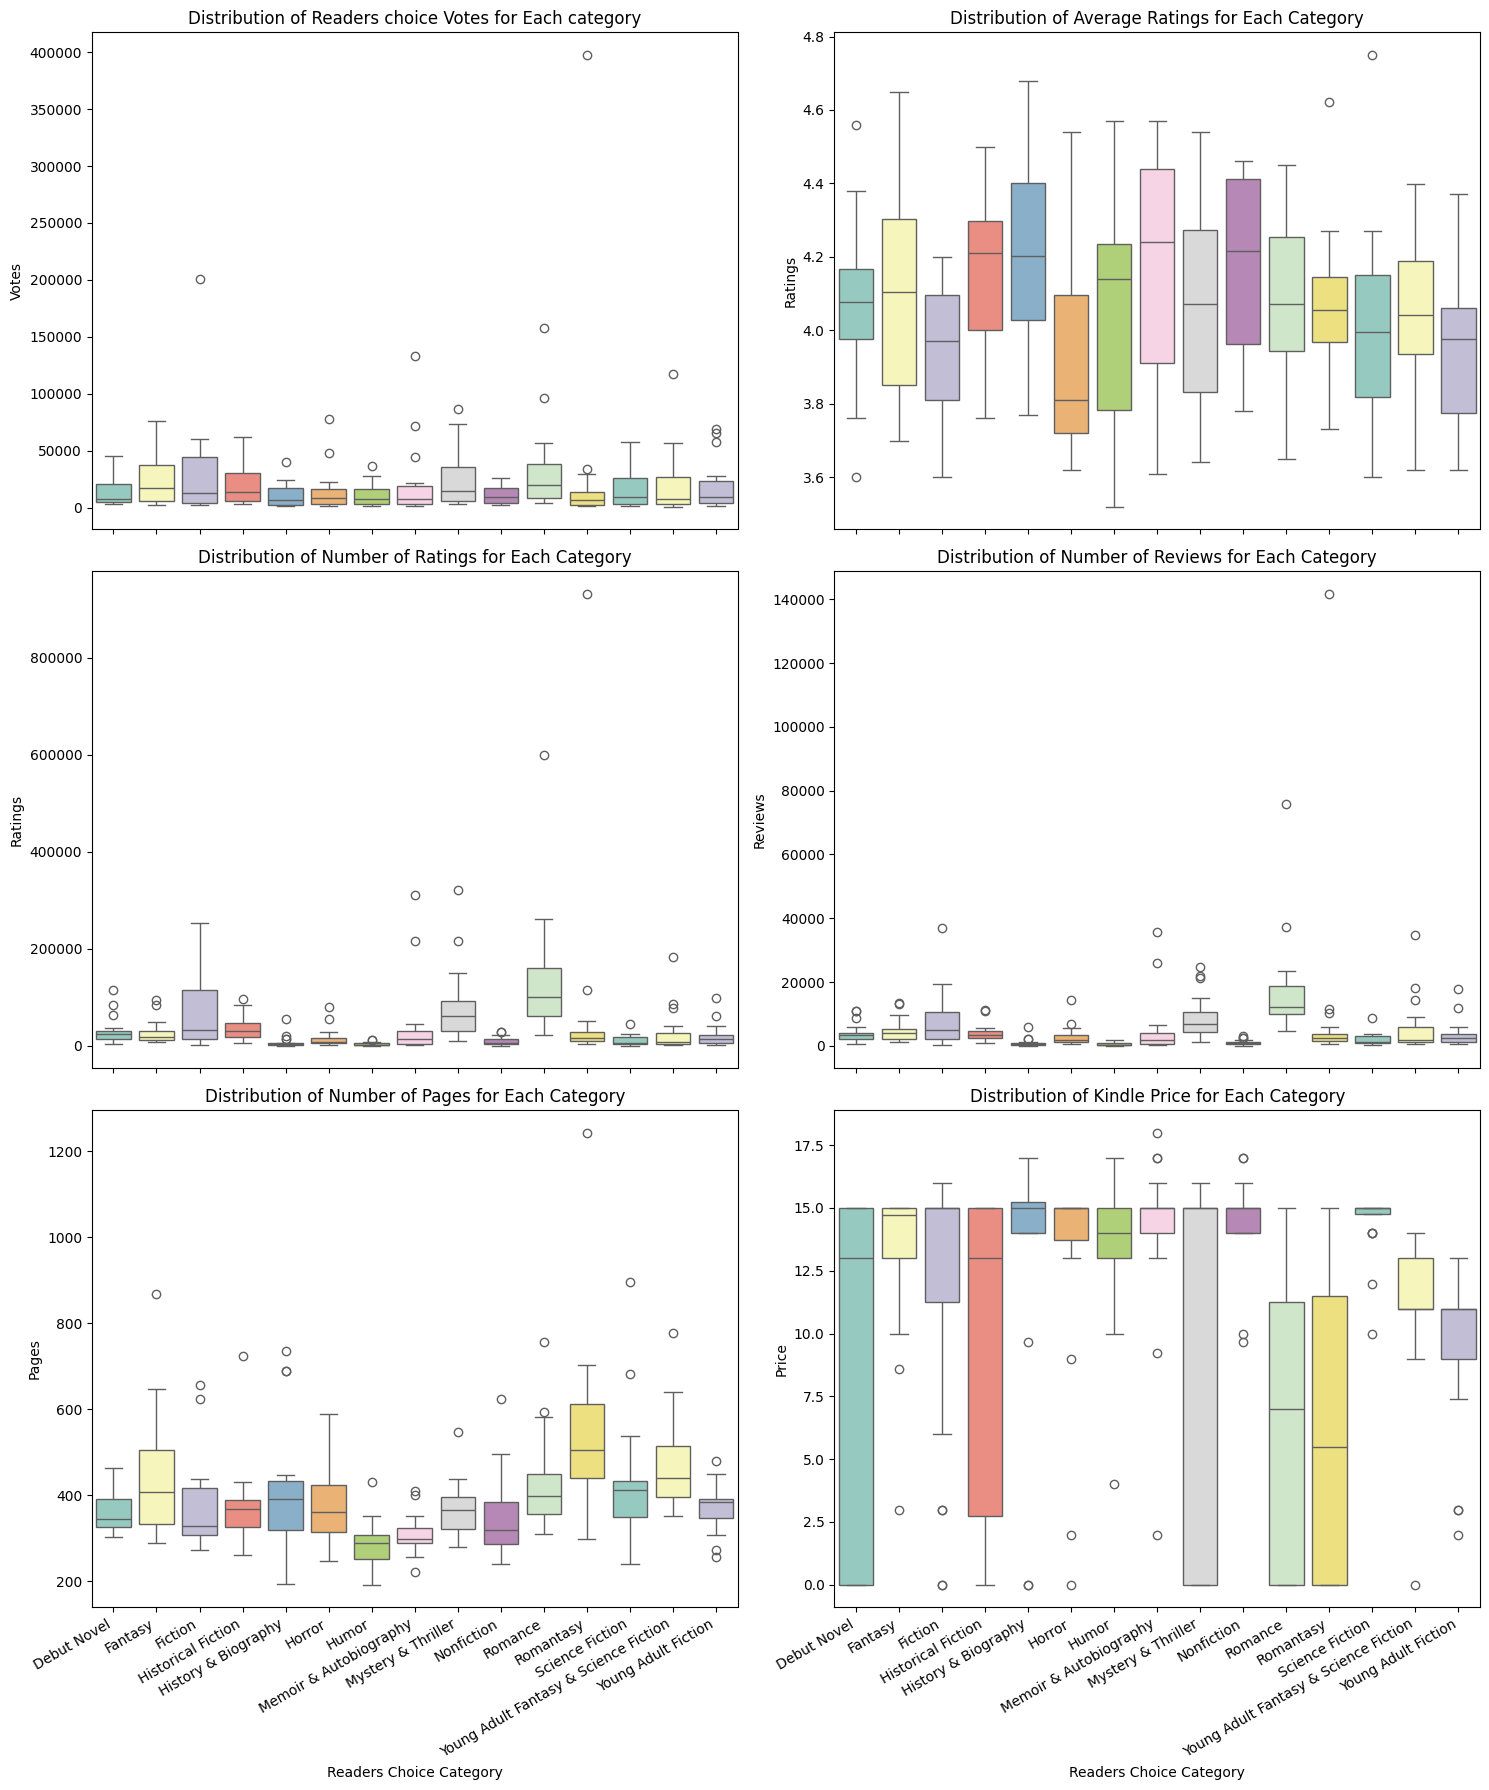

In [64]:
### Plotting the distributions using boxplots

fig, axes = plt.subplots(3,2, figsize=(15,18), sharex=True, sharey=False)

### Distribution of Readers Choice Votes

sns.boxplot(data=df, x='Readers Choice Category', y='Readers Choice Votes', palette='Set3', ax=axes[0,0])
axes[0,0].set_title('Distribution of Readers choice Votes for Each category')
axes[0,0].set_ylabel('Votes')


## Distribution of Average Ratings

sns.boxplot(data=df, x='Readers Choice Category',y='Total Avg Rating', palette='Set3', ax=axes[0,1])
axes[0,1].set_title('Distribution of Average Ratings for Each Category')
axes[0,1].set_ylabel('Ratings')

## Distribution of Number of ratings

sns.boxplot(data=df, x='Readers Choice Category', y='Number of Ratings', palette='Set3', ax=axes[1,0])
axes[1,0].set_title('Distribution of Number of Ratings for Each Category')
axes[1,0].set_ylabel('Ratings')

## Distribution of Number of Reviews

sns.boxplot(data=df, x='Readers Choice Category', y='Number of Reviews', palette='Set3', ax=axes[1,1])
axes[1,1].set_title('Distribution of Number of Reviews for Each Category')
axes[1,1].set_ylabel('Reviews')

## Distribution of Number of Pages

sns.boxplot(data=df, x='Readers Choice Category', y='Number of Pages', palette='Set3', ax=axes[2,0])
axes[2,0].set_title('Distribution of Number of Pages for Each Category')
axes[2,0].set_ylabel('Pages')


# Distribution of Kindle Price
sns.boxplot(data=df, x='Readers Choice Category', y='Kindle Price', palette='Set3', ax=axes[2,1])
axes[2,1].set_title('Distribution of Kindle Price for Each Category')
axes[2,1].set_ylabel('Price')

for ax in axes[2,:]:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right')


fig.tight_layout()
plt.show()


### Observation

The majority of the distributions are skewed, with some categories containing extreme outliers. However, the distribution of average ratings is normally distributed. For skewed data, the median is the most effective measure of central tendency, as it is less affected by extreme values or outliers.

### Analyzing by Category

In [65]:
#Determine which column we want to aggregate
aggregations = {'Readers Choice Votes': 'sum', 
                'Total Avg Rating': 'mean',
               'Number of Ratings': 'sum',
               'Number of Reviews': 'sum',
                'Number of Pages': 'median',
                'Kindle Price': 'median',
               }

#Group by book category
category_vote = df.groupby('Readers Choice Category').agg(aggregations).reset_index()
#print(category_vote)

most_popular_category=category_vote.sort_values('Readers Choice Votes', ascending=False).iloc[0]
print(f'The most Popular Category in 2023 is : {most_popular_category['Readers Choice Category']}')


The most Popular Category in 2023 is : Romance


In [66]:
# Determine which column we want to aggregate
aggregations = {
    'Readers Choice Votes': 'sum',
    'Total Avg Rating': 'mean',
    'Number of Ratings': 'sum',
    'Number of Reviews': 'sum',
    'Number of Pages': 'median',
    'Kindle Price': 'median',
}

# Group by book category
category_vote = df.groupby('Readers Choice Category').agg(aggregations).sort_values('Readers Choice Votes', ascending=False)

# Calculate the percentage of total votes, total ratings, and total reviews for each category
total_votes = category_vote['Readers Choice Votes'].sum()
total_ratings = category_vote['Number of Ratings'].sum()
total_reviews = category_vote['Number of Reviews'].sum()
percent_of_total_votes = (category_vote['Readers Choice Votes'] / total_votes) * 100
percent_of_total_ratings = (category_vote['Number of Ratings'] / total_ratings) * 100
percent_of_total_reviews = (category_vote['Number of Reviews'] / total_reviews) * 100

# Create new DataFrame of Votes, Ratings, and Reviews
result_df = pd.DataFrame({
    'Votes (sum)': category_vote['Readers Choice Votes'],
    '% Votes': percent_of_total_votes,
    'Avg Ratings': category_vote['Total Avg Rating'].round(2),
    'Number of Ratings': category_vote['Number of Ratings'],
    '% of Total Ratings': percent_of_total_ratings.round(2),
    'Number of Reviews': category_vote['Number of Reviews'],
    '% of Total Reviews': percent_of_total_reviews.round(2),
    'Median Pages': category_vote['Number of Pages'],
    'Median Kindle Price': category_vote['Kindle Price'].round()
})

# Find the most voted category
max_voted_cat = result_df['Votes (sum)'].idxmax()
max_votes = result_df['Votes (sum)'].max()
avg_rat = result_df.loc[max_voted_cat, 'Avg Ratings']

# Find the most rated category
max_rated_cat = result_df['Number of Ratings'].idxmax()
max_rates = result_df['Number of Ratings'].max()
pct_max_rates = result_df['% of Total Ratings'].max()

# Find the most reviewed category
max_reviewed_cat = result_df['Number of Reviews'].idxmax()
max_reviews = result_df['Number of Reviews'].max()
pct_max_reviews = result_df['% of Total Reviews'].max()

# Print the results
print(f"The category '{max_voted_cat}' is The Most Voted Category of 2023, with {max_votes:,} votes.")
print(f"The category '{max_rated_cat}' is The Most Rated Category of 2023, having an average rating of {format(avg_rat, '.2f')}, and number of ratings: {max_rates:,}, or {format(pct_max_rates, '.2f')}% of total ratings.")
print(f"The category '{max_reviewed_cat}' is The Most Reviewed Category of 2023, with {max_reviews:,} number of reviews, or {format(pct_max_reviews, '.2f')}% of total reviews.")

result_df

The category 'Romance' is The Most Voted Category of 2023, with 645,601 votes.
The category 'Romance' is The Most Rated Category of 2023, having an average rating of 4.05, and number of ratings: 2,737,676, or 23.63% of total ratings.
The category 'Romance' is The Most Reviewed Category of 2023, with 336,747 number of reviews, or 21.49% of total reviews.


,Votes (sum),% Votes,Avg Ratings,Number of Ratings,% of Total Ratings,Number of Reviews,% of Total Reviews,Median Pages,Median Kindle Price
Readers Choice Category,,,,,,,,,
Romance,645601,10.981079,4.05,2737676,23.63,336747,21.49,398.0,7.0
Fiction,587718,9.996542,3.95,1288841,11.12,157445,10.05,328.0,15.0
Romantasy,572812,9.743005,4.07,1387830,11.98,203928,13.01,506.0,5.0
Mystery & Thriller,519745,8.840384,4.05,1673792,14.45,181312,11.57,365.5,15.0
Fantasy,456020,7.756480,4.10,523942,4.52,93625,5.97,407.5,15.0
Young Adult Fantasy & Science Fiction,400863,6.818311,4.04,543467,4.69,113098,7.22,440.0,11.0
Historical Fiction,390321,6.639001,4.14,692953,5.98,79846,5.09,368.0,13.0
Memoir & Autobiography,389374,6.622893,4.17,814014,7.03,99369,6.34,298.5,15.0
Young Adult Fiction,371283,6.315182,3.97,392355,3.39,73957,4.72,384.0,11.0


### Category Metrics

Now, we are going to plot that data to have a better understanding and visualization.

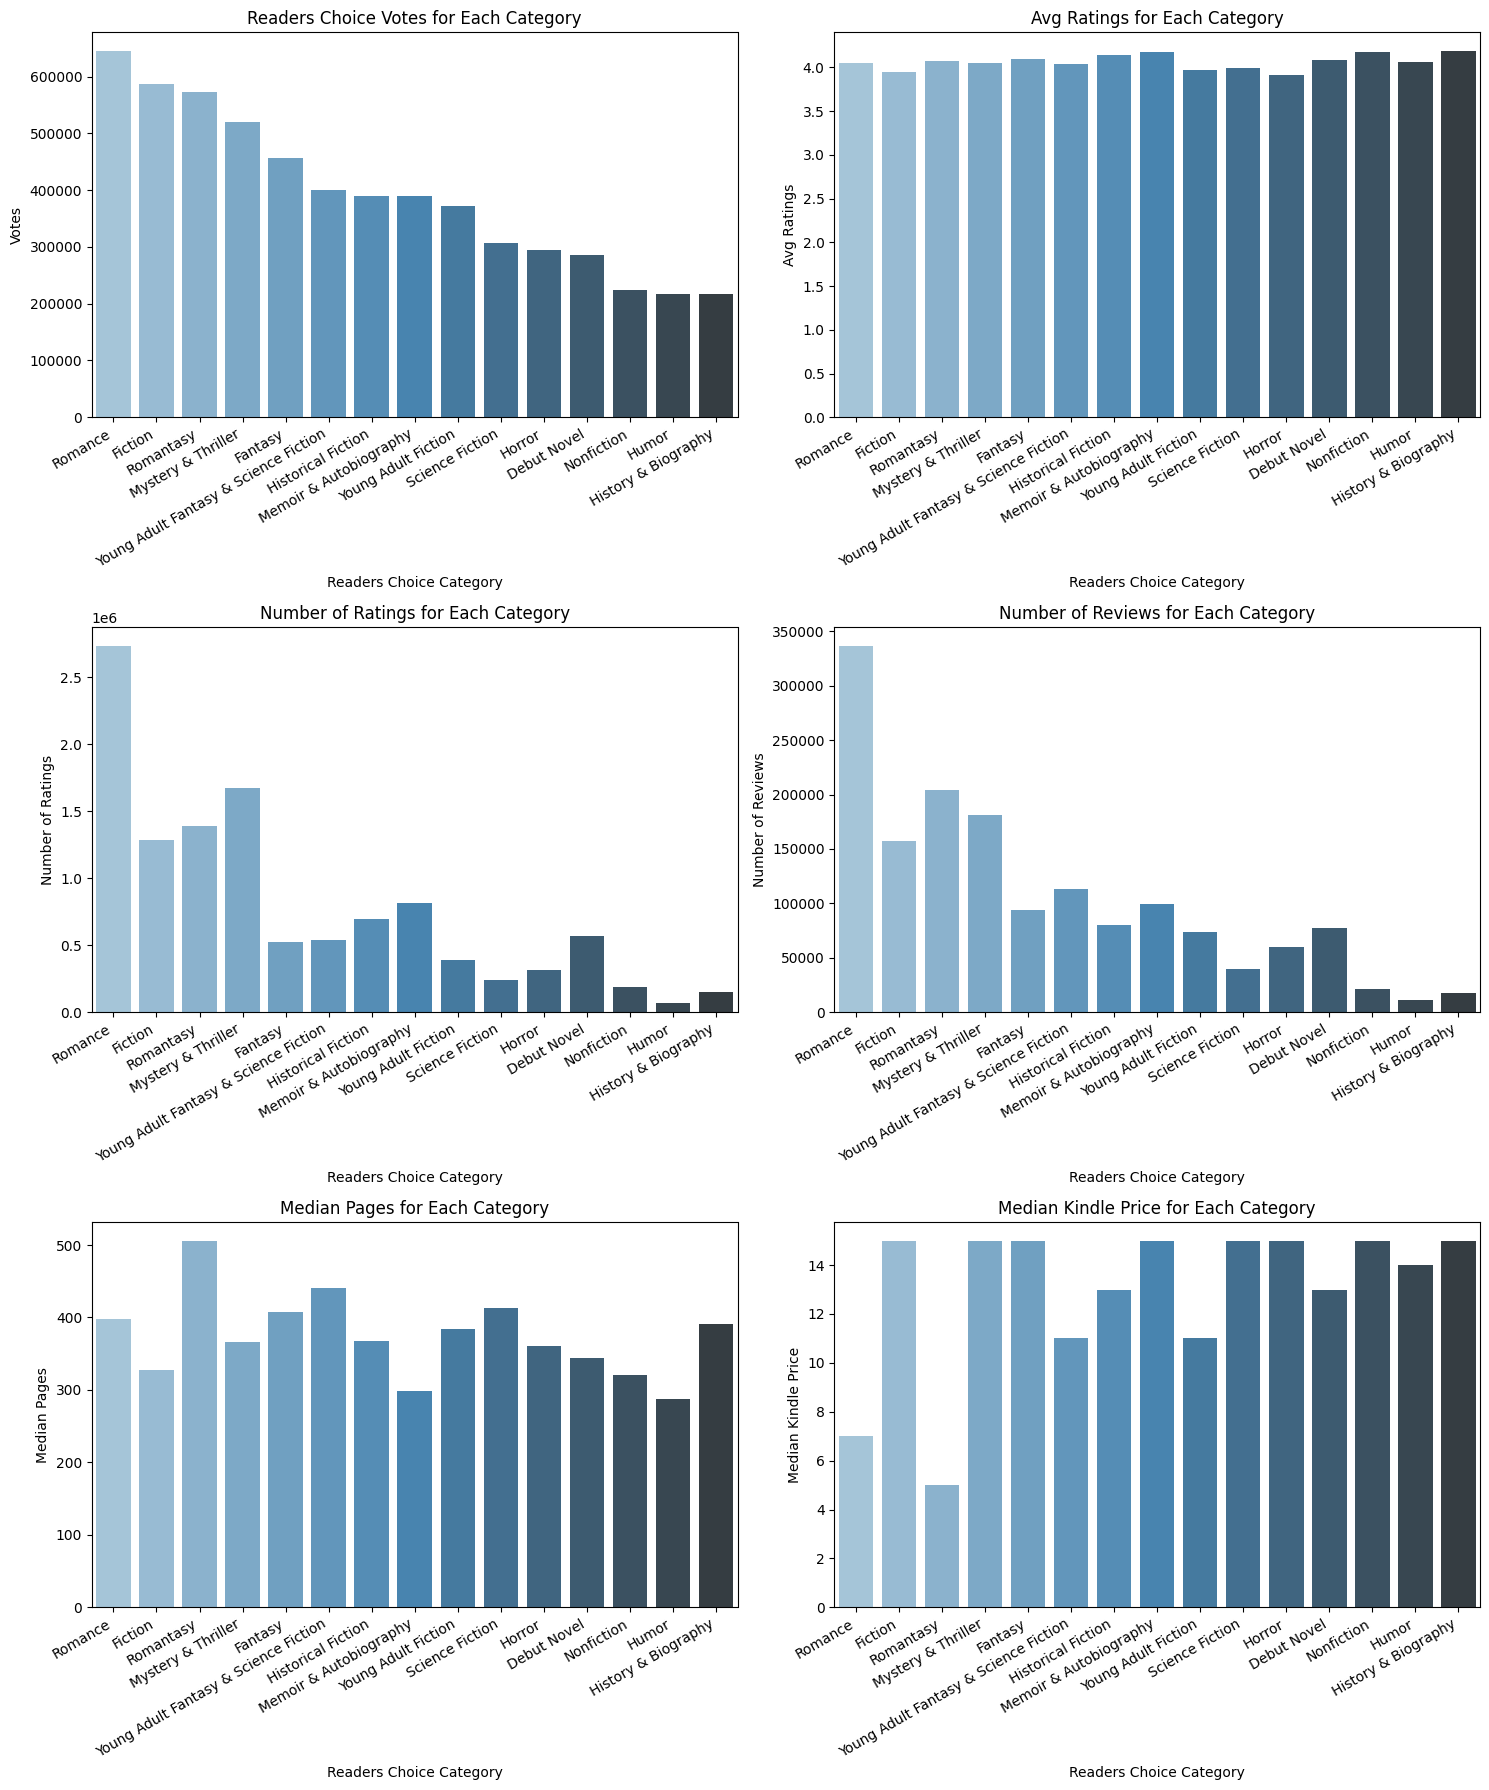

In [67]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18), sharey=False)

sns.barplot(x=result_df.index, y=result_df['Votes (sum)'], palette='Blues_d', order=result_df.index, ax=axes[0, 0])
axes[0, 0].set_title("Readers Choice Votes for Each Category")
axes[0, 0].set_ylabel("Votes")
axes[0, 0].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

sns.barplot(x=result_df.index, y=result_df['Avg Ratings'], palette='Blues_d', order=result_df.index, ax=axes[0, 1])
axes[0, 1].set_title("Avg Ratings for Each Category")
axes[0, 1].set_ylabel("Avg Ratings")
axes[0, 1].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

sns.barplot(x=result_df.index, y=result_df['Number of Ratings'], palette='Blues_d', order=result_df.index, ax=axes[1, 0])
axes[1, 0].set_title("Number of Ratings for Each Category")
axes[1, 0].set_ylabel("Number of Ratings")
axes[1, 0].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

sns.barplot(x=result_df.index, y=result_df['Number of Reviews'], palette='Blues_d', order=result_df.index, ax=axes[1, 1])
axes[1, 1].set_title("Number of Reviews for Each Category")
axes[1, 1].set_ylabel("Number of Reviews")
axes[1, 1].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

sns.barplot(x=result_df.index, y=result_df['Median Pages'], palette='Blues_d', order=result_df.index, ax=axes[2, 0])
axes[2, 0].set_title("Median Pages for Each Category")
axes[2, 0].set_ylabel("Median Pages")
axes[2, 0].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

sns.barplot(x=result_df.index, y=result_df['Median Kindle Price'], palette='Blues_d', order=result_df.index, ax=axes[2, 1])
axes[2, 1].set_title("Median Kindle Price for Each Category")
axes[2, 1].set_ylabel("Median Kindle Price")
axes[2, 1].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

plt.tight_layout()
plt.show()


### Observation 

Although Romance does not have the highest average ratings, it claims the title of Most Popular Book Category in 2023, outperforming other categories in votes, ratings, and reviews. It doubles the numbers of the second-place category in both ratings and reviews. In contrast, Humor and History & Biography were the two least popular book categories of 2023.

## Correlation Analysis
Are there any correlations between votes, reviews, rating, or even the number of pages and price?

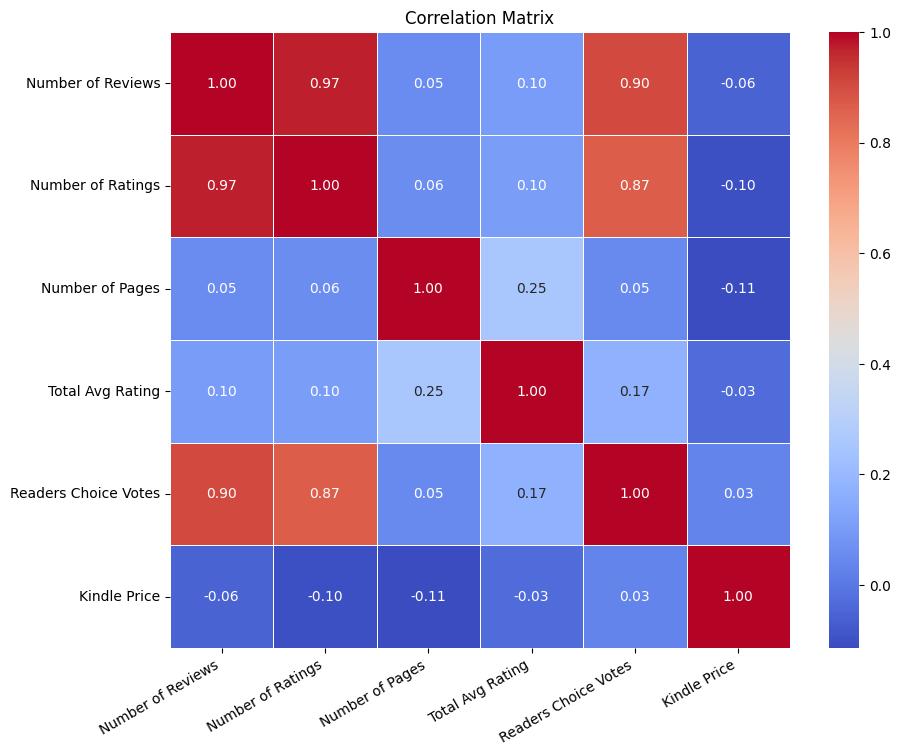

In [68]:
# Assign the columns
col_of_interest = ['Number of Reviews', 'Number of Ratings', 'Number of Pages', 'Total Avg Rating', 'Readers Choice Votes', 'Kindle Price']

# Calculate the correlation matrix
corr_matrix = df[col_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

### Observation 

The matrix reveals a strong correlation between Readers' Choice Votes, Number of Reviews, and Number of Ratings. Higher reviews and ratings are associated with higher votes. Conversely, pages and price show weak correlations with votes, ratings, and reviews, indicating that a book's cost and length have minimal influence on these metrics.

## Analyzing by Books
It’s time to find out which book takes the title as the Most Voted Book in 2023. We will identify the book that received the highest number of votes in the Goodreads Choice Awards 2023.

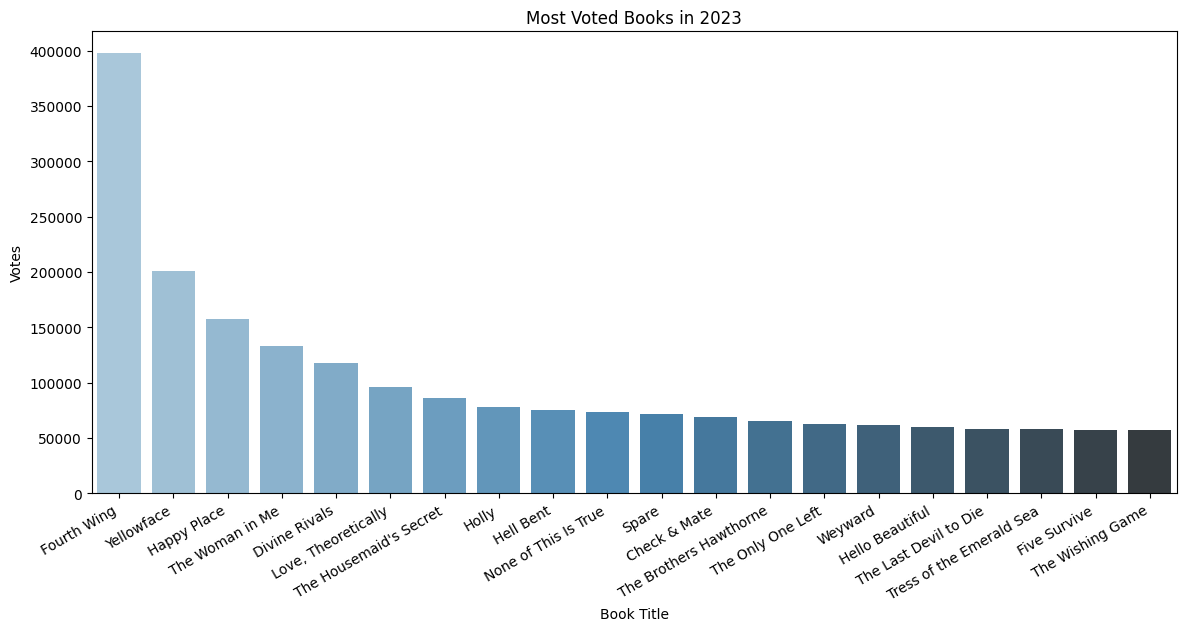

In [69]:
most_voted_books = df[['Title', 'Readers Choice Category', 'Readers Choice Votes', 'Total Avg Rating', 'Number of Ratings', 'Number of Reviews', 'Number of Pages']].sort_values(by=['Readers Choice Votes', 'Number of Ratings', 'Number of Reviews'], ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(x=most_voted_books['Title'], y=most_voted_books['Readers Choice Votes'], data=most_voted_books, palette='Blues_d')
plt.title("Most Voted Books in 2023")
plt.xlabel("Book Title")
plt.ylabel("Votes")
plt.xticks(rotation=30, ha='right')
plt.show()

### observation 

Fourth Wing dominates the 2023 Readers Choice Vote as the Most Popular Book, receiving almost twice the votes as second place Yellowface and close to a million ratings. It takes over half of the votes just for the Romantasy category.

In [70]:
### Now let’s take a look at the winners from every category.


max_votes_index = df.groupby('Readers Choice Category')['Readers Choice Votes'].idxmax()
titles_with_max_votes = df.loc[max_votes_index, ['Readers Choice Category', 'Title', 'Readers Choice Votes', 'Total Avg Rating', 'Number of Ratings', 'Number of Reviews', 'Number of Pages']].sort_values('Readers Choice Votes', ascending=False)

titles_with_max_votes

,Readers Choice Category,Title,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages
80,Romantasy,Fourth Wing,397565,4.621094,930928,141668,500
0,Fiction,Yellowface,200722,3.869141,252189,37032,336
60,Romance,Happy Place,157687,4.050781,599665,75814,400
239,Memoir & Autobiography,The Woman in Me,132867,4.050781,215178,26056,277
160,Young Adult Fantasy & Science Fiction,Divine Rivals,117671,4.261719,183916,34829,357
40,Mystery & Thriller,The Housemaid's Secret,86468,4.281250,321845,21398,318
140,Horror,Holly,77993,4.191406,54849,6818,449
100,Fantasy,Hell Bent,75800,4.160156,94667,13508,481
180,Young Adult Fiction,Check & Mate,68736,4.058594,60351,11800,352
20,Historical Fiction,Weyward,62211,4.121094,83461,11008,329


##  Publication Month
We are going to analyze by month published by using barplot to find out the number of books released every month in 2023.

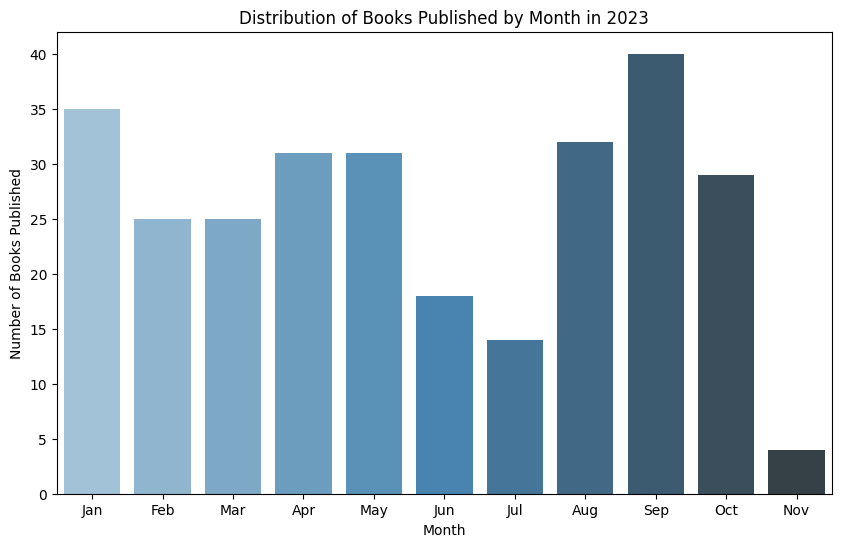

,Month,Title
0,Jan,35
1,Feb,25
2,Mar,25
3,Apr,31
4,May,31
5,Jun,18
6,Jul,14
7,Aug,32
8,Sep,40
9,Oct,29


In [71]:
import calendar
#df['First Published date'] = pd.to_datetime(df['First Published date'])

# Get only the books from year 2023
books_2023 = df[df['First Published date'].dt.year == 2023]

# Count how many books released every month
books_per_month = books_2023.groupby(books_2023['First Published date'].dt.month)['Title'].count().reset_index()
books_per_month['Month'] = books_per_month['First Published date'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(10, 6))
sns.barplot(data=books_per_month, x='Month', y='Title', palette='Blues_d')
plt.title("Distribution of Books Published by Month in 2023")
plt.xlabel("Month")
plt.ylabel("Number of Books Published")
plt.show()

books_per_month[['Month', 'Title']]

### Observation 

November has the least books released, while September and January are the months that have the most books released.